In [11]:
#load the object index 
import requests
import os
objects = requests.get('https://brainlife.io/api/warehouse/secondary/list/%s'%os.environ['PROJECT_ID']).json()

#dump the content of index and examine
#for obj in objects:
#    print(obj["path"]) #directory path under input directory that this object is stored in 
#    print(obj["datatype"]["name"]) #name of the datatype (neuro/tractprofile, neuro/tractmeasures, etc..)   
#    #contains information about which app and output that this object came from
#    print(obj["app"])
#    print(obj["output"]) #contains metadata, tags, datatype_tags, desc
#    print(obj["finish_date"])

from IPython.display import JSON
JSON(objects)

<IPython.core.display.JSON object>

In [13]:
#load participants info
import json
with open("input/participants.json") as f:
    participants = json.load(f)
    #print(participants)

with open("input/participants_column.json") as f:
    participants_column = json.load(f)
    #print(participants_column)


In [14]:
import pandas

gamer_rois=[]
nongamer_rois=[]

#iterate over all neruo/parc-stats objects
#TODO - there could be multiple objects per subjects (dedupe?)
for obj in objects:
    
    #filter out objects we don't care
    if obj["datatype"] != "neuro/parc-stats":
        continue
   
    #sometimes files goes missing..
    path="input/"+obj["path"]
    if not os.path.exists(path):
        continue

    #now load csv
    subject=obj["output"]["meta"]["subject"]
    print("loading rois.csv for",subject)
    csv = pandas.read_csv(path+"/rois.csv", index_col="subjectID")

    #organize 
    if subject in participants:
        phenotype = participants[subject]
        if phenotype["group"] == "Gamer":
            gamer_rois.append(csv)
        else:
            nongamer_rois.append(csv)
                        
#show a sample..
print(gamer_rois[0])

#convert to a single panda frame for each group
gamer_rois = pandas.concat(gamer_rois)
nongamer_rois = pandas.concat(nongamer_rois)

print(gamer_rois)

loading rois.csv for 14
loading rois.csv for 15
loading rois.csv for 03
loading rois.csv for 12
loading rois.csv for 10
loading rois.csv for 05
loading rois.csv for 01
loading rois.csv for 08
loading rois.csv for 13
loading rois.csv for 04
loading rois.csv for 09
loading rois.csv for 06
loading rois.csv for 02
loading rois.csv for 11
loading rois.csv for 07
loading rois.csv for delete
loading rois.csv for 16
loading rois.csv for 17
loading rois.csv for 18
loading rois.csv for 20
loading rois.csv for 19
           ROI_name  actual_vol  BrainVol_proportion  centroid_x  centroid_y  \
subjectID                                                                      
15            ROI_2      261184             0.201943  -30.463163   92.311548   
15            ROI_4        6166             0.004767  -16.068804   94.077709   
15            ROI_5         197             0.000152  -36.136332   83.724598   
15            ROI_7       15383             0.011894  -22.989602   46.913682   
15          

In [187]:
#import numpy as np
#compute mean/std for each column
gamer = gamer_rois.groupby(["ROI_name"]).agg([np.mean, np.std])
nongamer = nongamer_rois.groupby(["ROI_name"]).agg([np.mean, np.std])

#pick rois that we want
rois=[
#"ROI_10",
#"ROI_1001",
"ROI_1002",
"ROI_1003",
"ROI_1005",
"ROI_1006",
#"ROI_1007",
"ROI_1008",
"ROI_1009",
"ROI_1010",
"ROI_1011",
"ROI_1012",
"ROI_1013",
"ROI_1014",
"ROI_1015",
#"ROI_1016",
#"ROI_1017",
"ROI_1018",
"ROI_1019",
"ROI_1020",
"ROI_1021",
"ROI_1022",
"ROI_1023",
"ROI_1024",
"ROI_1025",
"ROI_1026",
"ROI_1027",
"ROI_1028",
"ROI_1029",
"ROI_1030",
"ROI_1031",
"ROI_1032",
#"ROI_1033",
"ROI_1034",
"ROI_1035",
"ROI_11",
"ROI_12",
"ROI_13",
"ROI_14",
"ROI_15",
"ROI_16",
"ROI_17",
"ROI_18",
#"ROI_2",
"ROI_2001",
"ROI_2002",
"ROI_2003",
"ROI_2005",
"ROI_2006",
"ROI_2007",
#"ROI_2008",
"ROI_2009",
"ROI_2010",
"ROI_2011",
"ROI_2012",
"ROI_2013",
"ROI_2014",
"ROI_2015",
#"ROI_2016",
"ROI_2017",
"ROI_2018",
"ROI_2019",
"ROI_2020",
"ROI_2021",
"ROI_2022",
"ROI_2023",
"ROI_2024",
"ROI_2025",
"ROI_2026",
#"ROI_2027",
#"ROI_2028",
"ROI_2029",
"ROI_2030",
"ROI_2031",
"ROI_2032",
"ROI_2033",
"ROI_2034",
"ROI_2035",
"ROI_24",
#"ROI_251",
#"ROI_252",
#"ROI_253",
#"ROI_254",
#"ROI_255",
"ROI_26",
"ROI_28",
"ROI_30",
"ROI_31",
#"ROI_4",
#"ROI_41",
"ROI_43",
"ROI_44",
"ROI_46",
#"ROI_47",
"ROI_49",
"ROI_5",
#"ROI_50",
#"ROI_51",
#"ROI_52",
#"ROI_53",
#"ROI_54",
#"ROI_58",
#"ROI_60",
#"ROI_62",
#"ROI_63",
#"ROI_7",
#"ROI_72", #roi 72 is missing from gamer.. but exist on nongamer WHY!?
"ROI_77",
#"ROI_8",
"ROI_85"
]

gamer_sub = gamer[ gamer.index.isin(rois) ]
nongamer_sub = nongamer[ nongamer.index.isin(rois) ]


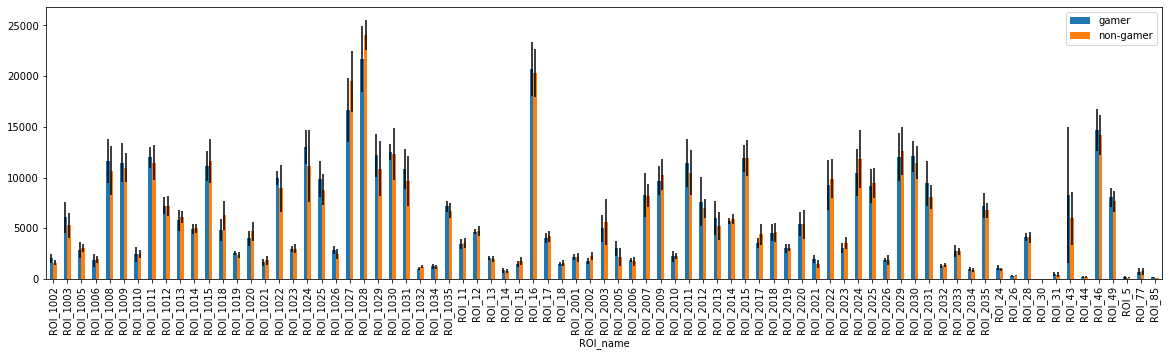

In [189]:
df_mean = pandas.DataFrame({
    "gamer": gamer_sub["actual_vol"]["mean"], 
    "non-gamer": nongamer_sub["actual_vol"]["mean"], 
})
df_std = pandas.DataFrame({
    "gamer": gamer_sub["actual_vol"]["std"], 
    "non-gamer": nongamer_sub["actual_vol"]["std"], 
})
df_mean.plot.bar(figsize=(20,5), yerr=df_std,logy=False)

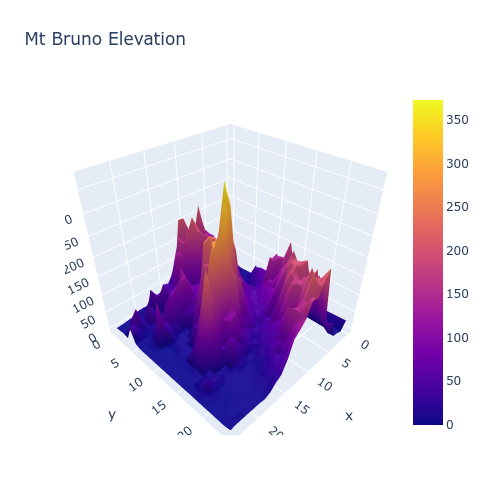

In [2]:
#bonus.. plotlyjs vis example
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()